In [4]:
# magic command for reload 
%load_ext autoreload
%autoreload 2

import numpy as np
import torch

from src.data.utils import get_formulas, get_max_length, get_formula_length_histogram
from src.data.dataset import get_dataloader, BaseDataset, TrainDataset
from src.model.transformer2 import ResNetTransformer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Example usage:
image_dir = 'dataset/formula_images_processed/'
image_list_file = 'dataset/im2latex_train_filter.lst'
label_file = 'dataset/im2latex_formulas.norm.lst'
# label_file = 'dataset/im2latex_formulas.tok.lst'

In [4]:
# get all formulas
formulas = get_formulas(label_file)

# # get max length of formulas
# max_len = get_max_length(formulas)

# get a histogram of formula lengths
hist = get_formula_length_histogram(formulas)

# set max_len to where formula occurs at least 100 times using histogram
max_len = get_max_length(formulas, min_occurrences=100)

# tokenizer = TokenizerWrap(formulas, max_len, reverse=True)

In [69]:
tokenizer1 = Tokenizer(formulas)
# tokenizer2 = Tokenizer2()
# tokenizer2.train(formulas)

In [37]:
len(tokenizer1), len(tokenizer2), tokenizer1.vocab.get_default_index()

(595, 98, 3)

In [ ]:
tokenizer1.decode(tokenizer1.encode(formulas[0]))

In [ ]:
tokenizer1.decode(tokenizer1.encode(formulas[18]))
# tokenizer2.decode(tokenizer2.encode(formulas[0]))

In [18]:
dataset_root = 'dataset'
images_folder = 'formula_images_processed'
label_file = 'im2latex_formulas.norm.lst'
data_train_filter = 'im2latex_train_filter.lst'

dataset = BaseDataset(dataset_root, images_folder, label_file, data_train_filter)


In [25]:
len(dataset.tokenizer)

500

In [89]:
import torchvision
resnet = torchvision.models.resnet18(pretrained=True)

/home/masoud/workspace/math2latex/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/masoud/workspace/math2latex/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [104]:
for data in dataset:
    print(data[0].size, data[1])
    break

(160, 64) \widetilde \gamma _ { \mathrm { h o p f } } \simeq \sum _ { n > 0 } \widetilde { G } _ { n } { \frac { ( - a ) ^ { n } } { 2 ^ { 2 n - 1 } } }


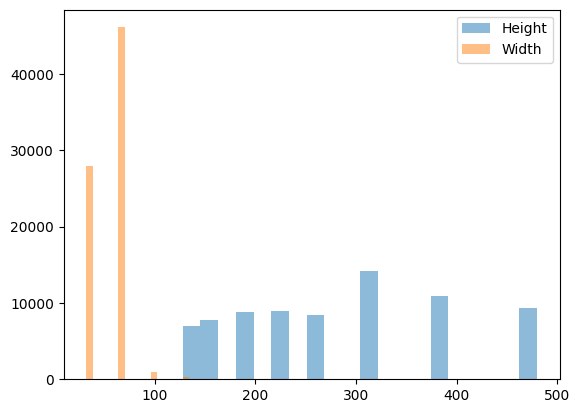

Max height: 480
Max width: 160
Min height: 128
Min width: 32


In [120]:
import matplotlib.pyplot as plt

heights = []
widths = []

for data in dataset:
    h, w = data[0].size
    heights.append(h)
    widths.append(w)

max_height = max(heights)
max_width = max(widths)

plt.hist(heights, bins=20, alpha=0.5, label='Height')
plt.hist(widths, bins=20, alpha=0.5, label='Width')
plt.legend(loc='upper right')
plt.show()

print(f"Max height: {max_height}")
print(f"Max width: {max_width}")

print(f"Min height: {min(heights)}")
print(f"Min width: {min(widths)}")

In [134]:
dataset[1][0].size

(224, 32)

In [6]:
from src.model.transformer2 import ResNetTransformer

In [10]:
# model = ResNetTransformer(d_model=128,
#                           num_heads=4,
#                           num_encoder_layers=2,
#                           num_decoder_layers=3,
#                           dim_feedforward=256,
#                           dropout=0.2)

model = ResNetTransformer(d_model=128,
        dim_feedforward=256,
        num_heads=4,
        dropout=0.2,
        num_decoder_layers=3,
        max_output_len=150,
        sos_index=1,
        eos_index=2,
        pad_index=0,
        num_classes=500)

In [47]:
dataset_root = 'dataset'
images_folder = 'formula_images_processed'
label_file = 'im2latex_formulas.norm.lst'
data_train_filter = 'im2latex_train_filter.lst'

dataset = TrainDataset(dataset_root, images_folder, label_file, data_train_filter)

dl = get_dataloader(dataset, batch_size=2, num_workers=0)
for i, data in enumerate(dl):
    print(data[0].shape, data[1].shape)
    break

torch.Size([2, 3, 64, 224]) torch.Size([2, 150])


In [50]:
result = model(data[0], data[1])

In [51]:
result.shape

torch.Size([2, 500, 150])

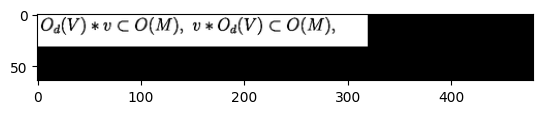

In [34]:
data[0][0][0]

import matplotlib.pyplot as plt

plt.imshow(data[0][1][0], cmap='gray')

In [1]:
%load_ext autoreload
%autoreload 2

from src.config import config
from src.runner import Runner

In [2]:
runner = Runner(config)

In [3]:
runner.train()

Epoch: 0 Iteration: 0 Loss: tensor(6.3444)
Epoch: 0 Iteration: 100 Loss: tensor(3.0467)
Epoch: 0 Iteration: 200 Loss: tensor(1.9689)
Epoch: 0 Iteration: 300 Loss: tensor(1.3905)
Epoch: 0 Iteration: 400 Loss: tensor(1.0660)
Epoch: 0 Iteration: 500 Loss: tensor(0.8644)
Epoch: 0 Iteration: 600 Loss: tensor(0.7281)
Epoch: 0 Iteration: 700 Loss: tensor(0.6287)
Epoch: 0 Iteration: 800 Loss: tensor(0.5543)
Epoch: 0 Iteration: 900 Loss: tensor(0.4950)
Epoch: 0 Iteration: 1000 Loss: tensor(0.4469)
Epoch: 0 Iteration: 1100 Loss: tensor(0.4078)
Epoch: 0 Iteration: 1200 Loss: tensor(0.3746)
Epoch: 0 Iteration: 1300 Loss: tensor(0.3474)
Epoch: 0 Iteration: 1400 Loss: tensor(0.3232)
Epoch: 0 Iteration: 1500 Loss: tensor(0.3022)
Epoch: 0 Iteration: 1600 Loss: tensor(0.2840)
Epoch: 0 Iteration: 1700 Loss: tensor(0.2677)
Epoch: 0 Iteration: 1800 Loss: tensor(0.2530)
Epoch: 0 Iteration: 1900 Loss: tensor(0.2399)
Epoch: 0 Iteration: 2000 Loss: tensor(0.2283)
Epoch: 0 Iteration: 2100 Loss: tensor(0.2178)


KeyboardInterrupt: 